In [1]:
import IPython.display as ipd

html = ipd.display(ipd.HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/p814BapRq2U" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>'))
html

/Users/mton/miniconda3/envs/torch-gpu/lib/python3.9/site-packages/IPython/core/display.py:419: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


There's been a bit of an explosion of AI-generated art recently, with the advent  
of CLIP-guided text-to-image methods and a renewed interest in all things  
generative. Diving into the various communities, I quickly realised that  
although there are lots of folks using these methods, only a small subset feel  
confident enough with the code to modify the notebooks being shared around. 
 
This course aims to change that by equipping more coders and artists with the  
understanding and tools necessary to explore this space, creating new tools and  
getting to grips with existing ones.

The idea had been brewing for some time, but when I put out this tweet expecting  
one or two responses and ended up with more engagement than I'd ever seen before  
it became obvious that this needs to happen asap :)

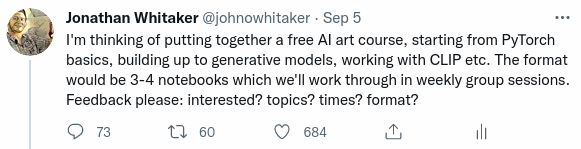

How was this `IMAGE` embedded ^? 

- ![Screenshot from 2021-09-12 09-08-09.png](data:image/png;base64 ... )

There's been a bit of an explosion of AI-generated art recently, with the advent  
of CLIP-guided text-to-image methods and a renewed interest in all things  
generative. Diving into the various communities, I quickly realised that  
although there are lots of folks using these methods, only a small subset feel  
confident enough with the code to modify the notebooks being shared around.  
This course aims to change that by equipping more coders and artists with the  
understanding and tools necessary to explore this space, creating new tools and  
getting to grips with existing ones.

The idea had been brewing for some time, but when I put out this tweet expecting  
 one or two responses and ended up with more engagement than I'd ever seen  
 before it became obvious that this needs to happen asap :)

We'll be using Discord to run the course and keep everything organised. If you  
haven't already, do join us there (https://discord.gg/P92X2pxC) to  
stay up-to-date on all things course-related. These notebooks are designed to  
work as standalone lessons, but you'll get much more value out of them if you  
join us in our weekly sessions (Sundays 4pm UTC) to work through the material  
together.

There will be four main lessons along with additional bonus notebooks. We'll  
start with Lesson #1 on September 19 and do one every week following that. The  
content for each lesson will hopefully be released at least a week before the  
live session. Links to the notebooks for each lesson will be included here as  
they become available:

- Lesson #1 (This one!): Intro to PyTorch and Optimizing via Gradient Descent
- Lesson #2: Learning Representations, ConvNets, Style Transfer and Auto-Encoders
- Lesson #3: GANs and CLIP
- Lesson #4: Going Further

# Navigating The Notebooks

![Navigating](https://c.tenor.com/CbhnRg0n7ksAAAAM/kermit-the-frog-looking-for-directions.gif)

We're cramming a lot into each lesson, but don't despair! A lot of the code will  
be illustrative examples which you can skim now and refer to later if you ever  
need to remind yourself about some specific function. 

Our goal is NOT to memorize everything, merely to get a high-level overview. I  
recommend collapsing sections as we complete them to make navigation easier, and  
if you get lost remember that you can see the table of contents in the panel on  
the left. 

Within each section there will be 
- Text explanations with code examples
- Video content (currently just part of the full run-through video linked at the top)
- Coding exercises to practice what you've learnt
- Discussion questions to talk through as a group, marked with **THINK/DISCUSS**

This is version one of this course, so there may be mistakes or concepts that  
are unclear. Please ask questions and share any feedback via Discord or directly  
during the live lessons.

The live lessons will be recorded (if participants are OK with that), so if  
you're working through this after we run the lesson there will be a video you  
can work along with linked here. 

At the start of each notebook, we'll have a setup section that imports some  
libraries that will give us access to functionality beyond that offered by  
Python's standard library. If you haven't already run it, scroll up to the  
start of this notebook and run the cell so that you're ready to view the videos  
and dive into the code. You'll notice the code is hidden - click 'show code' to  
see what's going on. Throughout these notebooks we'll hide code to keep things  
tidy, but you can always take a peek under the hood to see what's going on. 

# Section 1: Pytorch and Tensors

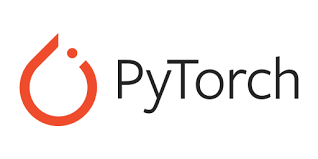

PyTorch is primarily a deep learning framework. It has been designed to make  
creating and working with deep neural networks as easy, fast and flexible as  
possible. Today we'll look at one of the core components that makes this  
possible: tensors. We'll start by looking at how to contruct and manipulate  
tensors, and then we'll explore the magic of autograd and how we can use it for  
optimization with gradient descent. 

Video:
- What is PyTorch?
- Creating tensors
- Modifying them
- Debugging tips
- Images as tensors

A lot of the material for this lessson was taken from the excellent content  
over at https://deeplearning.neuromatch.io/tutorials/W1D1_BasicsAndPytorch/student/W1D1_Tutorial1.html

## 1.1 Creating Tensors

![tensor lesson 1](https://i.imgflip.com/5moxki.jpg)

We can construct a tensor directly from some common python iterables, such as  
list and tuple. Nested iterables can also be handled as long as the dimensions  
make sense.

In [2]:
import torch
import numpy as np

# tensor from a list
a = torch.tensor([0, 1, 2])

# tensor from a tuple of tuples
b = ((1.0, 1.1), (1.2, 1.3))
b = torch.tensor(b)

# tensor from a numpy array
c = np.ones([2,3])
c = torch.tensor(c)

print(f'--[a]-- \n{a}')
print(f'--[b]-- \n{b}')
print(f'--[c]-- \n{c}')


--[a]-- 
tensor([0, 1, 2])
--[b]-- 
tensor([[1.0000, 1.1000],
        [1.2000, 1.3000]])
--[c]-- 
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [3]:
# The numerical arguments we pass to these constructors determine the shape of  
# the output tensor - try changing them and see what happens

x = torch.ones(2,3)
print(f'--[x]-- \n{x}')
y = torch.zeros(3,2)
print(f'--[y]-- \n{y}')
# empty just allocates memory, and is slightly faster at creating tensors
# values aren't guaranteed to be initialized to zero, and can be Nan ...etc
z = torch.empty(1,1,5)
print(f'--[z]-- # 1 row, 1 column, 5 z-depth \n{z}')

--[x]-- 
tensor([[1., 1., 1.],
        [1., 1., 1.]])
--[y]-- 
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
--[z]-- # 1 row, 1 column, 5 z-depth 
tensor([[[0., 0., 0., 0., 0.]]])


**THINK/DISCUSS** : Explain the `DIFFERENCE` between random `UNIFORM` and `NORMAL` distribution

 Random `UNIFORM` distribution and `NORMAL` distribution are both types of  
 probability distributions used in probability theory and statistics to  
 describe the distribution of a random variable.

 - A random `UNIFORM` distribution is a distribution where all values within a  
   defined range are equally likely to occur. In other words, every possible  
   value within the range has the same probability of occurring. For example,  
   if we have a uniform distribution over the interval [0,1], any value in that  
   interval is `EQUALLY LIKELY` to occur.  
 - A `NORMAL` distribution, on the other hand, is a distribution that is  
   `BELL-SHAPED` and `SYMMETRICAL` around a `CENTRAL` value. The normal distribution  
   is characterized by two parameters: MEAN and STANDARD DEVIATION. The `MEAN`  
   represents the `CENTRAL` value around which the distribution is symmetrical,  
   and the `STANDARD` deviation represents the `SPREAD` or variability of the  
   distribution. In a `NORMAL` distribution, more values are `LIKELY` to occur near   
   the `MEAN` than at the `TAILS`, and the probabilities of the values decrease as  
   they move further from the mean.  
   
 To summarize, the key difference between a random uniform distribution and a  
 normal distribution is that the former has an equal probability of every value  
 within a specified range, while the latter is bell-shaped and has a higher  
 probability of values near the mean and lower probabilities of values further  
 away from the mean.

In [4]:
# constructors for random numbers

# @audit-ok ☑ : Explain the difference between randn and rand
# ANSWER 🔎 :
# In NumPy, rand and randn are both methods that can be used to generate random 
# numbers. The key differences between rand and randn are:
# - rand generates random numbers from a uniform distribution over the interval 
#   (0, 1), while randn generates random numbers from a standard normal 
#   distribution with mean 0 and standard deviation 1.
# - rand takes a tuple (or integers separated by commas) specifying the shape of 
#   the output array as an argument, while randn takes individual integers 
#   representing the dimensions of the output array.
# In summary, rand generates numbers from a uniform distribution and takes the 
# shape of the output array as a tuple argument, while randn generates numbers 
# from a normal distribution and takes the dimensions of the output array as 
# individual integer arguments.

# uniform distribution
a = torch.rand(1,3)
print(f'--[a]-- rand  => [uniform] \n{a}')

# normal distribution
b = torch.randn(3,4) # randn ... n == normal
print(f'--[b]-- randn => [normal] \n{b}')

--[a]-- rand  => [uniform] 
tensor([[0.4413, 0.9132, 0.0016]])
--[b]-- randn => [normal] 
tensor([[ 0.0877,  0.3855,  1.9366, -0.8222],
        [-0.3612, -0.1372,  0.1364, -0.8558],
        [ 0.6892, -0.1472, -0.3996,  0.0403]])


(array([12.,  7., 13., 11., 13.,  5., 12.,  5., 14.,  8.]),
 array([0.00706482, 0.10599867, 0.20493251, 0.30386636, 0.4028002 ,
        0.501734  , 0.6006679 , 0.69960177, 0.7985356 , 0.8974694 ,
        0.9964033 ], dtype=float32),
 <BarContainer object of 10 artists>)

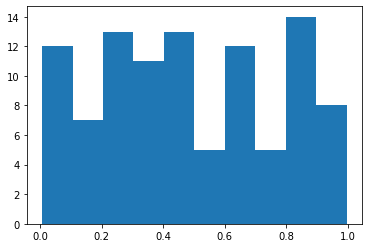

In [5]:
import matplotlib.pyplot as plt

# @audit 🖶 : plot a histogram of uniform distribution
uniform_plot = plt.hist(torch.rand(100))
uniform_plot

(array([  1.,   3.,  16.,  55., 111., 123.,  95.,  67.,  23.,   6.]),
 array([-3.6228843 , -2.9691548 , -2.3154254 , -1.6616958 , -1.0079663 ,
        -0.35423684,  0.29949266,  0.95322216,  1.6069516 ,  2.2606812 ,
         2.9144106 ], dtype=float32),
 <BarContainer object of 10 artists>)

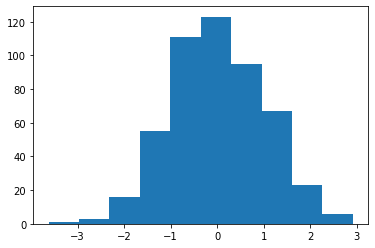

In [6]:
# @audit 🖶 : plot a histogram of normal distribution
normal_plot = plt.hist(torch.randn(500))
normal_plot

In [7]:
# construct NEW tensors with dimensions equal to EXISTING tensors
c = torch.zeros_like(a)
print(f'--[c]-- zeros_like(a) \n{c}\n')

d = torch.randn_like(b)
# @audit 🛑 : Explain why must be of tensor float else : "normal_kernel_cpu" not implemented for 'Long'
print(f'--[d]-- randn_like(b) \n{d}\n')


--[c]-- zeros_like(a) 
tensor([[0., 0., 0.]])

--[d]-- randn_like(b) 
tensor([[ 0.2638, -0.2962, -0.5397,  0.4818],
        [-0.5074,  1.1828,  1.3624, -2.6193],
        [ 0.3095,  0.5399,  0.1442, -0.5348]])



In [8]:
# Return evenly spaced values within a given interval.
a = torch.arange(0, 30, step=3)
print(f'--[a]-- # equivalent to np.arange(0, 30, step=3) \n{a}\n')

# np.linspace allows you to define how many values you get including the 
# specified min and max value. It infers the stepsize:
# Return evenly spaced numbers over a specified interval.
b = torch.linspace(0, 5, steps=11)
print(f'--[b]-- # equivalent to np.linspace(0, 5, steps=11) \n{b}\n')

--[a]-- # equivalent to np.arange(0, 30, step=3) 
tensor([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

--[b]-- # equivalent to np.linspace(0, 5, steps=11) 
tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000,
        4.5000, 5.0000])



#### Coding Exercise 1 : Creating Tensors

Below you will find some incomplete code. Fill in the missing code to construct  
the specified tensors.  

We want the tensors:

`A` : 20 by 21 tensor consisting of ones  
`B` : a tensor with elements equal to the elements of numpy array Z  
`C` : a tensor with the same number of elements as A but with values ∼U(0,1)  
`D` : a 1D tensor containing the even numbers between 4 and 40 inclusive.  

In [9]:
# The numpy array required for B
Z = np.vander([1,2,3], 4)

A = torch.ones(20, 21)
print(f'20 by 21 tensor of ones => [A = {A.shape}]')

B = torch.tensor(Z)
print(f'[B = {B.shape}] with elements equal to elements of [Z = {Z.shape}]')

# The notation "∼U(0,1)" typically refers to a random variable that is UNIFORMLY 
# distributed between 0 and 1
C = torch.rand_like(A)
print(f'tensor same shape as [A], but UNIFORM random values between 0 and 1\n--[C]--\n{C}\n')

D = torch.arange(4, 41, step=2) # to be inclusive of 40, we need end=41 (40+1)
print(f'1D tensor of even numbers from 4 to 40 inclusive => [D]\n{D}')
# 

20 by 21 tensor of ones => [A = torch.Size([20, 21])]
[B = torch.Size([3, 4])] with elements equal to elements of [Z = (3, 4)]
tensor same shape as [A], but UNIFORM random values between 0 and 1
--[C]--
tensor([[0.4045, 0.2814, 0.3160, 0.0574, 0.2546, 0.0450, 0.2626, 0.3515, 0.3602,
         0.2678, 0.2430, 0.0239, 0.6912, 0.2578, 0.7000, 0.2826, 0.4448, 0.9928,
         0.7526, 0.6447, 0.4153],
        [0.9329, 0.0965, 0.7518, 0.7280, 0.1713, 0.7609, 0.1287, 0.9244, 0.2566,
         0.5778, 0.1118, 0.2049, 0.9907, 0.9060, 0.0394, 0.9625, 0.7693, 0.9458,
         0.8008, 0.4274, 0.0528],
        [0.5374, 0.4408, 0.3653, 0.9020, 0.7661, 0.2469, 0.1194, 0.2667, 0.4315,
         0.1147, 0.0790, 0.2647, 0.1064, 0.8815, 0.6256, 0.7595, 0.0875, 0.2960,
         0.0584, 0.8974, 0.1383],
        [0.9552, 0.7203, 0.5937, 0.3914, 0.0268, 0.4819, 0.3804, 0.0246, 0.6802,
         0.2942, 0.3344, 0.8054, 0.6612, 0.1827, 0.3055, 0.9182, 0.2492, 0.9765,
         0.9796, 0.1024, 0.9202],
        [0.37

## 1.2 Tensor Operations

![tensor operations](https://thumbs.gfycat.com/ElementaryDimpledBeardedcollie-max-1mb.gif)

We can perform operations on tensors using methods under `torch.`. However, in  
PyTorch most common Python operators are overridden, so we can use those  
instead. The `common standard arithmetic operators (+, -, \*, /, and **)` have   
all been `lifted to elementwise operations`.

In [10]:
x = torch.tensor([1,2,4,8])
y = torch.tensor([1,2,3,4])
print(f'[ADD] torch.add(x,y) = {torch.add(x,y)}')
print(f'[ADD]          x + y = {x + y} # element-wise addition')

print(f'SCRATCHPAD for other ELEMENT-WISE operations : ')
# @audit 🛑 : Explain what is x^y?  it's NOT exponentiation
x+y, x-y, x*y, x/y, x**y, x^y # the ** operator is exponentiation

[ADD] torch.add(x,y) = tensor([ 2,  4,  7, 12])
[ADD]          x + y = tensor([ 2,  4,  7, 12]) # element-wise addition
SCRATCHPAD for other ELEMENT-WISE operations : 


(tensor([ 2,  4,  7, 12]),
 tensor([0, 0, 1, 4]),
 tensor([ 1,  4, 12, 32]),
 tensor([1.0000, 1.0000, 1.3333, 2.0000]),
 tensor([   1,    4,   64, 4096]),
 tensor([ 0,  0,  7, 12]))

**THINK/DISCUSS:** What does element-wise mean, inspect the outputs above and discuss

ANSWER : `ELEMENT-WISE` operations is an operation performed `INDIVIDUALLY` on   
each `ELEMENT` of an set/array/matrix rather than the `ENTIRE` set/array/matrix  
as a `WHOLE`

Tensors also have many built-in methods such as .mean() or .sum()  
(see the full list here: https://pytorch.org/docs/stable/tensors.html).  
Whenever you're working with a multi-dimensional tensor, pay attention  
to the dimensions and think about what result you're aiming to achieve.

In [11]:
x = torch.rand(3,3)
print(f'--[x]-- \n{x}\n')
# sum() - note the axis is the axis your move across when summing
print(f'[SUM] of every element : x.sum()       => {x.sum()}')
print(f'[SUM] of the columns   : x.sum(axis=0) => {x.sum(axis=0)}') # type: ignore
print(f'[SUM] of the rows      : x.sum(axis=1) => {x.sum(axis=1)}') # type: ignore

--[x]-- 
tensor([[0.1666, 0.0575, 0.1898],
        [0.1928, 0.3682, 0.8613],
        [0.0821, 0.1880, 0.0140]])

[SUM] of every element : x.sum()       => 2.120293140411377
[SUM] of the columns   : x.sum(axis=0) => tensor([0.4415, 0.6137, 1.0651])
[SUM] of the rows      : x.sum(axis=1) => tensor([0.4139, 1.4223, 0.2841])


#### Coding Exercise 2
1) Display the means of each column in x
2) Make a new tensor `x_squared` which is x but every element has been raised to  
the power of 2
3) Find the sum of all elements in `x_squared`

In [12]:
x_column_means = x.mean(axis=0) # type: ignore
print(f'(1) [MEAN] of every column : x.mean(axis=0)   => {x_column_means}')

x_squared = torch.tensor(x)**2
print(f'(2) [SQUARED] new tensor : torch.tensor(x)**2 => \n{x_squared}')

x_squared_sum = x_squared.sum()
print(f'(3) [SUM] of every element : x_squared.sum() => {x_squared_sum}')


(1) [MEAN] of every column : x.mean(axis=0)   => tensor([0.1472, 0.2046, 0.3550])
(2) [SQUARED] new tensor : torch.tensor(x)**2 => 
tensor([[2.7744e-02, 3.3094e-03, 3.6034e-02],
        [3.7165e-02, 1.3559e-01, 7.4184e-01],
        [6.7412e-03, 3.5329e-02, 1.9605e-04]])
(3) [SUM] of every element : x_squared.sum() => 1.023945689201355


<ipython-input-12-a3f44f1ba324>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_squared = torch.tensor(x)**2


By `DEFAULT`, operations are `ELEMENT-WISE` ... but what if want the `MATRIX`  
operations?

Here's how:

1) `MATRIX MULTIPLICATION` : supported via `torch.matmul()` or the `@` symbol
2) `DOT MULTIPLICATION`    : supported via `torch.dot()  
// No, dot multiplication is not the same as dot product. Dot multiplication is  
not a well-defined operation and does not have a standard definition in  
mathematics. In contrast, dot product, also known as scalar product, is a  
specific mathematical operation that takes two equal-length sequences of  
numbers [1], usually coordinate vectors, and returns a scalar value. The dot  
product is defined as the sum of the products of the corresponding entries in  
the two vectors. It is an important concept in linear algebra and is often used  
in a variety of mathematical and scientific fields.  
// @audit 🛑 ... is this true?
3) `2D TENSOR TRANSPOSES`  : supported via `torch.t()` or `Tensor.T`  
// Note the lack of `Tensor.T` - it is an attribute, not a method

In [13]:
# Create a few tensors and try some of these solutions
transpose_2d = torch.rand(3,5)
print(f'--[transpose_2d init]-- \n{transpose_2d}\n')
print(f'--[transpose_2d transposed]-- \n{transpose_2d.t()}\n')

transpose_1d = torch.rand(5)
print(f'--[transpose_1d init]-- \n{transpose_1d}\n')
print(f'--[transpose_1d transposed]-- (does not work because !2D) \n{transpose_1d.t()}\n')

transpose_3d = torch.rand(2,3,5)
print(f'--[transpose_3d init]-- \n{transpose_3d}\n')
# errors out because > 2D
# t() expects a tensor with <= 2 dimensions, but self is 3D
# print(f'--[transpose_3d transposed]-- \n{transpose_3d.t()}\n')

# @audit 🛑 : Understand if dot product is the same as shader normal and light direction
ray_A = torch.tensor([0.0,1.0,0.0]) # y-axis
ray_B = torch.tensor([1.0,0.0,0.0]) # x-axis
ray_C = torch.tensor([0.5,0.5,0.0]) # 45°
ray_D = torch.tensor([0.5,0.0,0.5]) # 90°
ray_A.dot(ray_B)
ray_A.dot(ray_C)
ray_C.dot(ray_D)

--[transpose_2d init]-- 
tensor([[0.0820, 0.2068, 0.2332, 0.7487, 0.7879],
        [0.6602, 0.2282, 0.5252, 0.2752, 0.9361],
        [0.4261, 0.3728, 0.0641, 0.5883, 0.0025]])

--[transpose_2d transposed]-- 
tensor([[0.0820, 0.6602, 0.4261],
        [0.2068, 0.2282, 0.3728],
        [0.2332, 0.5252, 0.0641],
        [0.7487, 0.2752, 0.5883],
        [0.7879, 0.9361, 0.0025]])

--[transpose_1d init]-- 
tensor([0.7633, 0.6922, 0.8595, 0.4283, 0.4104])

--[transpose_1d transposed]-- (does not work because !2D) 
tensor([0.7633, 0.6922, 0.8595, 0.4283, 0.4104])

--[transpose_3d init]-- 
tensor([[[0.9925, 0.5795, 0.2366, 0.9914, 0.4623],
         [0.7126, 0.5833, 0.0560, 0.9557, 0.0115],
         [0.3278, 0.1302, 0.6728, 0.6906, 0.5256]],

        [[0.8033, 0.5813, 0.3137, 0.2724, 0.6615],
         [0.2613, 0.4793, 0.8910, 0.5201, 0.7798],
         [0.1636, 0.8241, 0.0505, 0.4239, 0.2355]]])



tensor(0.2500)

## 1.3 Manipulating Tensors

Beyond mathematical operations, we often want to : 
* access specific items or sets of items in a tensor  
* perform operations like changing the shape of a tensor

Here are a few examples of some common tasks. These may feel simple if you're  
used to something like numpy, but it's worth making sure you know how to do these  
basic operations (or at least, you know where to find these examples again to  
refer to them!) since we'll use these a lot in the coming lessons.

In [14]:
# Indexing Tensors
x = torch.arange(0, 10)
print(f'x      => {x}')
print(f'x[-1]  => {x[-1]} # last element')
print(f'x[1:3] => {x[1:3]} # idx 1 up to BUT NOT INCLUDING index 3')
print(f'x[:-2] => {x[:-2]} # ALL elements up to BUT NOT INCLUDING the last 2')

x      => tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x[-1]  => 9 # last element
x[1:3] => tensor([1, 2]) # idx 1 up to BUT NOT INCLUDING index 3
x[:-2] => tensor([0, 1, 2, 3, 4, 5, 6, 7]) # ALL elements up to BUT NOT INCLUDING the last 2


Reshaping works when the Tensors shapes are compatible : 
* (3,4) => (8,2) --  NO -- because not enough elements (12 != 16)
* (3,4) => (4,3) -- YES -- same elements (3*4 and 4*3 = 12)


In [15]:
# Reshaping
z = torch.arange(12).reshape(6,2)
print(f'-- [original]   z (6,2) --\n{z}')

#transpose
z = z.t()
print(f'-- [transposed] z (2,6) --\n{z}')

#2d => 1d : APPENDS row by row until it has a 1d array
z = z.flatten()
print(f'-- [flattened]  z (12,) --\n{z}')

# and back to 2d
z = z.reshape(3,4)
print(f'-- [reshaped]   z (3,4) --\n{z}')

-- [original]   z (6,2) --
tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])
-- [transposed] z (2,6) --
tensor([[ 0,  2,  4,  6,  8, 10],
        [ 1,  3,  5,  7,  9, 11]])
-- [flattened]  z (12,) --
tensor([ 0,  2,  4,  6,  8, 10,  1,  3,  5,  7,  9, 11])
-- [reshaped]   z (3,4) --
tensor([[ 0,  2,  4,  6],
        [ 8, 10,  1,  3],
        [ 5,  7,  9, 11]])


[torch.cat] is used to concatenate tensors  
Take note of these examples, and how the dimension specified affects the output


In [16]:
# Create tensors of the same shape
x = torch.arange(12, dtype=torch.float32).reshape(3,4)
print(f'--[x]-- \n{x}\n')
y = torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])
print(f'--[y]-- \n{y}\n')

# Concatenate tensors along rows
cat_rows = torch.cat((x,y), dim=0) # dim=0 is the rows
print(f'-- [torch.cat((x,y), dim=0)] -- #rows \n--> [6,4] <-- (3,4) + (3,4)\n{cat_rows}\n')

# Concatenate tensors along columns
cat_columns = torch.cat((x,y), dim=1) # dim=1 is the columns
print(f'-- [torch.cat((x,y), dim=1)] -- #columns \n--> [3,8] <-- (3,4) + (3,4)\n{cat_columns}\n')

--[x]-- 
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

--[y]-- 
tensor([[2., 1., 4., 3.],
        [1., 2., 3., 4.],
        [4., 3., 2., 1.]])

-- [torch.cat((x,y), dim=0)] -- #rows 
--> [6,4] <-- (3,4) + (3,4)
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])

-- [torch.cat((x,y), dim=1)] -- #columns 
--> [3,8] <-- (3,4) + (3,4)
tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])



## 1.4 Squeezing Tensors

When processing batches of data, you will quite often be left with `SINGLETON`  
dimensions. e.g. `[1,10]` or `[256, 1, 3]`. 

This dimension can quite easily `MESS UP` your `MATRIX` operations if you don’t  
plan on it being there…   

In order to `COMPRESS` tensors along their `SINGLETON` dimensions (dimensions of size 1)  
we can use the `.squeeze()` method. We can use the `.unsqueeze()` method to do the  
opposite.

In [17]:
x = torch.randn(1, 10)
print(f'--[x]-- {x.shape} \n{x}')
# x[0] does NOT return the first number, BUT the INNER dimension instead
x_first_number = x[0]
print(f'- x[0] - \n{x_first_number}')

# we could do x[0][0] to get the first number, but that is tedious
# instead, we can use the squeeze() method to get rid of the extra dimension
# @audit-ok ☑ : Explain what's the difference between tensor squeeze vs flatten
# ANSWER : 
# squeeze() is used to
# - remove dimensions with size 1 to simplify the shape of a tensor
# - useful after convolution operations to remove SINGLETON dimensions
# - if there's no dimension with size 1, it does nothing and returns the
#   original tensor as is
# flatten() is used to:
# - when we want to process a multi-dimensional tensor as a 1D tensor
# - reshape to a 1D tensor while preserving the number of elements
# - since it reshapes it CREATES a NEW tensor
x_squeezed = x.squeeze(0)
x_first_number_squeezed = x_squeezed[0]
print(f'\n--[x.squeeze(0)]-- {x_squeezed.shape} \n{x_squeezed}')
print(f'- x.squeeze(0)[0] -> {x_first_number_squeezed}')
# squeeze() and flatten() happen to yield the same results in this case
# but flatten() does return a NEW tensor
x_flattened = x.flatten(0)
print(f'\n--[x.flatten0)]-- {x_flattened.shape} \n{x_flattened}')

--[x]-- torch.Size([1, 10]) 
tensor([[ 0.3343,  0.4109, -0.1128, -0.2233, -0.2847,  1.7426,  2.7676,  0.7603,
         -1.0724,  0.3321]])
- x[0] - 
tensor([ 0.3343,  0.4109, -0.1128, -0.2233, -0.2847,  1.7426,  2.7676,  0.7603,
        -1.0724,  0.3321])

--[x.squeeze(0)]-- torch.Size([10]) 
tensor([ 0.3343,  0.4109, -0.1128, -0.2233, -0.2847,  1.7426,  2.7676,  0.7603,
        -1.0724,  0.3321])
- x.squeeze(0)[0] -> 0.33425185084342957

--[x.flatten0)]-- torch.Size([10]) 
tensor([ 0.3343,  0.4109, -0.1128, -0.2233, -0.2847,  1.7426,  2.7676,  0.7603,
        -1.0724,  0.3321])


Adding singleton dimensions works a similar way, and is often used when tensors  
being added need same number of dimensions:

In [18]:
y = torch.arange(12)
print(f'--[y]-- {y.shape} \n{y}')

# y.squeeze() does nothing because there's no dimension with size 1
# returns the original tensor as is
y = y.squeeze()
print(f'\n--[y.squeeze()]-- [NO CHANGE] {y.shape}')

# reshape to a 2D tensor
y = y.reshape(3,4)
print(f'\n--[y.reshape(3,4)]-- {y.shape} \n{y}')

# @audit-ok 🔎 : Explain the shapes when using unsqueeze() with (1) and (2)
# @note 🧠 : unsqueeze() with >= 3 is invalid because you can't go from 2D to 4D
y = y.unsqueeze(0)
print(f'\n--[y.unsqueeze(0)]-- {y.shape} \n{y}')

y = y.squeeze()
print(f'\n--[y.squeeze()]-- {y.shape} \n{y}')

--[y]-- torch.Size([12]) 
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

--[y.squeeze()]-- [NO CHANGE] torch.Size([12])

--[y.reshape(3,4)]-- torch.Size([3, 4]) 
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

--[y.unsqueeze(0)]-- torch.Size([1, 3, 4]) 
tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]])

--[y.squeeze()]-- torch.Size([3, 4]) 
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


### Coding Exercise 3

1) Create a tensor shape (1, 10) containing the digits 5..14
2) Reshape to (2, 5)
3) Use indexing to access just the first column in this reshaped tensor

In [19]:
y = torch.arange(5, 15)
print(f'--[y]-- {y.shape} \n{y}')
y = y.reshape(2,5)
print(f'\n--[y]-- y.reshape(2,5) {y.shape} \n{y}')
print(f'\n--[y]-- y[:,0] # index the first COLUMN {y.shape} \n{y[:,0]}')

--[y]-- torch.Size([10]) 
tensor([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

--[y]-- y.reshape(2,5) torch.Size([2, 5]) 
tensor([[ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]])

--[y]-- y[:,0] # index the first COLUMN torch.Size([2, 5]) 
tensor([ 5, 10])


## 1.5 Image Operations

As you can imagine, we'll be dealing with images a lot in this course. In this  
section we'll look at loading images, working with them and displaying them  
using the PIL library and converting back and forth between the format expected  
by PIL and that commonly used for tensor image processing.  

First up, we need an image to play with. We'll grab one from a URL and open it  
using PIL aka the Pythin Imaging Library):

In [20]:
# Downloading the original hastily-prepared course logo:
!curl https://raw.githubusercontent.com/johnowhitaker/aiaiart/master/logo.png > logo.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  179k  100  179k    0     0   443k      0 --:--:-- --:--:-- --:--:--  498k


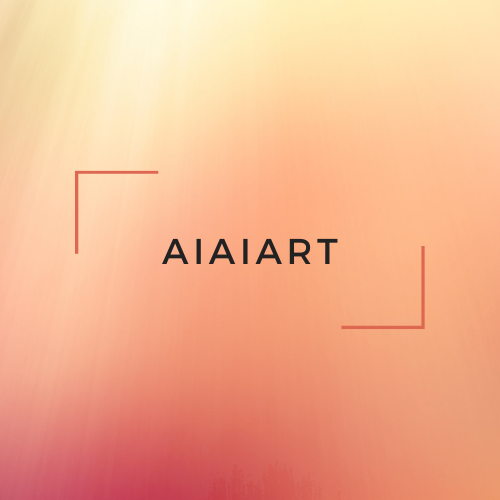

In [21]:
from PIL import Image

filename = 'logo.png'
img = Image.open(filename)
img # display the image : Jupyter supports easy display of images

We usually represent images as an array of pixels, each of which has a red,  
green and blue component (plus a transparency component in many cases). Let's  
convert our image to a numpy array and see how that data is organised:

In [22]:
img_array = np.array(img)
print(f'img_array.shape {img_array.shape}')

img_array.shape (500, 500, 4)


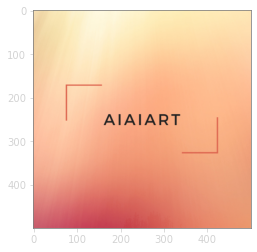

In [23]:
import matplotlib.pyplot as mpl
mpl.rcParams['figure.facecolor'] = 'none'
mpl.rcParams['axes.titlecolor'] = 'lightgrey'
mpl.rcParams['axes.edgecolor'] = 'grey'
mpl.rcParams['xtick.color'] = 'lightgrey'
mpl.rcParams['ytick.color'] = 'lightgrey'

plt.imshow(img_array) # matplotlib can display the images of RGB(A) channels

Converting to a tensor is easy since `torch.tensor` accepts numpy arrays as arguments:

In [24]:
img_tensor = torch.tensor(img_array)


This image has a shape corresponding to width x height x channels. However, many  
pytorch image operations expect the order to be channels x width x height.  
Permute to the rescue:

In [25]:
# permute from [width,height,channels[] to [channels,width,height]
# tensor.permute() is a useful method for rearranging the dimensions of a 
# PyTorch tensor to better suit your needs in computation and deep learning 
# contexts
# @note 🧠 :torch.permute() returned tensor is a VIEW OF the ORIGINAL tensor
# - this shares the SAME data, so ANY CHANGES to one will AFFECT the BOTH VIEWS
img_channels_permuted = img_tensor.permute(2,0,1)

# image array 
# - to tensor 
# - to chanels PERMUTED
print(f'-- [img_array.shape ] -- \n{img_array.shape}\n')
print(f'-- [img_tensor.shape] -- \n{img_tensor.shape}\n')
print(f'-- [img_channels_permuted.shape] -- \n{img_channels_permuted.shape}\n')

-- [img_array.shape ] -- 
(500, 500, 4)

-- [img_tensor.shape] -- 
torch.Size([500, 500, 4])

-- [img_channels_permuted.shape] -- 
torch.Size([4, 500, 500])



In this format we can access each channel individually:

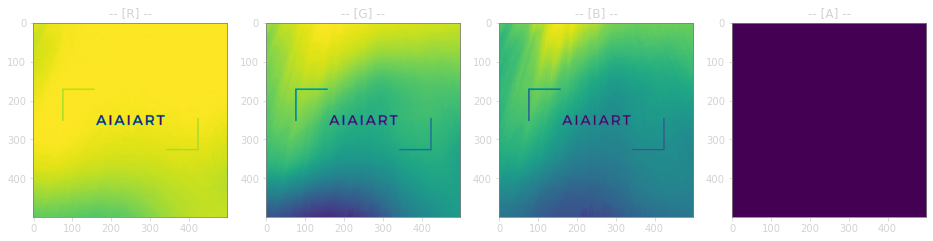

In [26]:
# Plotting each channel individually:
rgba = ['R','G','B','A']
fig, axs = plt.subplots(1,4, figsize=(16,4))
for i in range(4):
    axs[i].imshow(img_channels_permuted[i])
    axs[i].set_title(f'-- [{rgba[i]}] --')

One final thing to note: 

- not only do many PyTorch image operations expect channels x width x height, 
- they are also built around processing `BATCHES` of images, 
- so the final shape is `batch_size` x channels x width x height. 

When working with just `ONE` image we might need `.unsqueeze(0)` to create a BATCH of  
`size 1`

### Coding Exercise 4 : Image Operations

1) Drop the alpha channel to turn channels_first into an RGB image, and then use  
unsqueeze to make the shape [1, 3, WIDTH, HEIGHT]. Check this with .shape.  
2) Convert it back into the PIL/matplotlib format (w, h, c)  
3) Turn it back into a PIL Image (hint: Image.fromarray) and save it to a new file  
4) Use tensor indexing to 'crop' the center area of the image and display it  
5) See if you can swap some color channels around and visualize the result.  

In [27]:
# @audit : Your solution here
img_channels_rgb = img_channels_permuted.unsqueeze(0)
img_channels_rgb.shape

torch.Size([1, 4, 500, 500])

# Section 2 : Gradient Descent and Autograd

![skiing down a slope](https://media1.giphy.com/media/JrGH6KjBHJk38Y4nwm/giphy.gif)

Lets consider the following situation. Say we have:  

- A function (could be a neural net, could be the equation for a straight line...)  
that takes some `input(s)` and produces some `output(s)` based on a set of parameters -  
let's call them `w`.  
- Some measure of how well this function performs. Maybe this is how poorly the  
function describes some pattern in your data, or how well a network does in a  
classification task. Let's call this measure the `loss`, where the goal is to  
make this as `small as possible`.

The question is often 'how do we find a set of parameters that gives the best  
possible result?'. There are a few ways we could try to solve this. The most  
basic might be:  

- Try all possible values for all parameters  
- Randomly guess and keep the best  

Clearly both of these have some major flaws, and when we're dealing with   
thousands or millions of parameters there is no way you could try all possible   
combinations. So, we need a smarter approach.

## 2.1 The Gradient Descent Algorithm

What if we could start from some set of parameters, and then see how to modify   
them slightly such that we get an improvement? Ideally, for each parameter we'd   
like to know what happens to the loss when we tweak that parameter slightly up   
or down.  

Formally, we'd like to know the **gradient of the loss with respect to that parameter**.  
You can think of the gradient as telling us which direction to move  to get the   
biggest increase (or decrease if we go in the opposite direction).  

IF we can find these gradients, then a sensible method for finding a good set of  
parameters to solve a given problem would be  

1) Start with some `random` parameters  
2) Find the gradient of the `loss` with respect to each `parameter`  
3) `Update` each `parameter` such that you move some small amount in the direction  
of steepest descent  
4) Go back to step 2, finding the gradients based on the new parameter values  
and repeat all this a bunch of times.  

This is the gradient descent algorithm in a nutshell :) Let's do an example,  
where we'll create some data that roughtly follows a trend and try to approximate  
that trend with a straight line, which will be specified by two parameters.

## 2.2 Creating an Example Problem

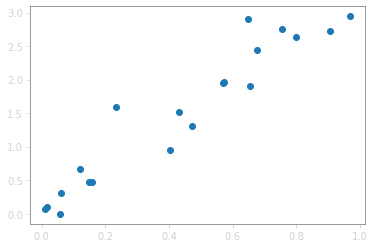

In [63]:
# Creating some data
x = torch.rand(20)
# y = ax + b + noise
y = 3*x + 0.2 + torch.randn(20)*0.3
# it's always helpful to visualize what's going on when possible
plt.scatter(x,y)


## 2.3 Defining our Loss
We can describe a line as a function y = ax + b where a and b are our parameters.  
Let's graph our 2 lines

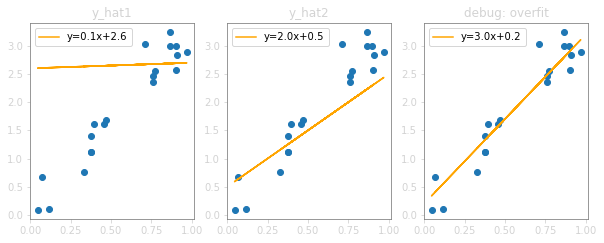

In [59]:
#@title Comparing Lines
fig, axs = plt.subplots(1,3, figsize=(10, 3.6))

axs[0].set_title('y_hat1')
axs[0].scatter(x,y)
# y_hat1 : randomly guessing a=0.1 and b=2.6
axs[0].plot(x, 0.1*x + 2.6, label='y=0.1x+2.6', c='orange')
axs[0].legend()

axs[1].set_title('y_hat2')
axs[1].scatter(x,y)
# y_hat2 : randomly guessing a=2.0 and b=0.5
axs[1].plot(x, 2.0*x + 0.5, label='y=2.0x+0.5', c='orange')
axs[1].legend()

axs[2].set_title('debug: overfit')
axs[2].scatter(x,y)
# @audit 📊 : DEBUG overfit plugging in [y = ax + b + noise] where a=3.0 and b=0.2
axs[2].plot(x, 3.0*x + 0.2, label='y=3.0x+0.2', c='orange')
axs[2].legend()

Clearly one does a better job than the other at describing the trend in this data.  
But how do we quantify this?  

There are several measures used in this sort of case,  with a popular one being  
the `Root Mean Squared Error`. 

It sounds intimidating, but all we do is :  

1) take the `errors` (how far each point is from the line) 
2) `square` them 
3) `sum` the squares 
4) and then take the `square root` of that

More points `further from the line -> higher errors` (squaring takes care of any  
minus signs that would otherwise cause issues with points above/below the  
line) -> a higher final value for the RMSE.  

So lower is better. This is our loss function.  

Here's one way to implement this in code (there are also built-in functions for  
this and many other ways you could write it):

In [46]:
def rmse(y, y_hat):
    return torch.mean((y-y_hat)**2)**0.5

# using this loss funtion we can quantify how well the lines match the data
y_hat1 = 0.1*x + 2.6
y_hat2 = 2.0*x + 0.5
# @audit 🖶 : the line that has a lower RMSE is a BETTER fit
print(f'RMSE for y_hat1 = 0.1*x + 2.6 => {rmse(y, y_hat1)}')
print(f'RMSE for y_hat2 = 2.0*x + 0.5 => {rmse(y, y_hat2)}')

RMSE for y_hat1 = 0.1*x + 2.6 => 1.2257212400436401
RMSE for y_hat2 = 2.0*x + 0.5 => 0.5266867876052856


`-- [Interactive] --` : Try out different values and see how close you can get

In [78]:
import ipywidgets as widgets
slope = widgets.FloatSlider(min=0, max=5, value=1)
offset = widgets.FloatSlider(min=-1, max=1, value=0)

def get_rmse(slope, offset):
    y_hat = slope*x + offset
    print(f'RMSE for y_hat = {slope:1.2}*x + {offset:1.2} => {rmse(y, y_hat):1.3}')
    # @audit-ok 🔎 : figure out how to display the plot with a nice alpha background
    with plt.rc_context({'figure.facecolor':'lightgrey'}):
        plt.scatter(x,y)
        plt.plot(x, y_hat, c='orange', label=f'y={slope}*x+{offset}')
        plt.legend()

out = widgets.interactive_output(get_rmse, {'slope':slope, 'offset':offset})
display(slope, offset, out)

FloatSlider(value=1.0, max=5.0)

FloatSlider(value=0.0, max=1.0, min=-1.0)

Output()

**THINK/DISCUSS**: What is your thought process as you play with the sliders?  
Are you doing something like the gradient descent described earlier?

ANSWER : it's interesting that with the interactive slider you can guess your  
way to original best fit :
- [y = ax + b + noise] where a=3.0 and b=0.2

## 2.4 Calculating Gradients

So, how do we find the gradients we keep talking about? If you're good at  
differentiation, you can look at a function and figure them out analytically.  

But this quickly breaks down when the function is complex or involves many steps.  

Fortunately, PyTorch does something called automatic differentiation, where it  
can keep track of every operation that happens to a tensor.  

It builds something called a computational graph, and when you want to calculate  
the gradients with respect to some final result you can simply call `.backward()`  
and PyTorch will trace the path back through this graph filling in the gradients  
at each step. 

We won't go too deep into this, but here's a simple example:

In [81]:
# Some operations to demonstrate autograd
a = torch.tensor(5.7)
# @note 🧠 : important to set this to TRUE, because that's NOT the DEFAULT
a.requires_grad = True
b = 5*a+2
c = torch.sin(2*b+0.1)
c

tensor(-0.9871, grad_fn=<SinBackward0>)

Notice that `grad_fn` bit there? Because : 

- c depends on something [torch.sin(2*b+0.1)]
- (b) that depends  [5*a+2]
- on a tensor that requires_grad (a), 

PyTorch keeps track of the function needed to calculate the gradients. 

We could then see the gradient of c with respect to a with:

In [82]:
# Tell pytorch to propagate the gradients back through the computation graph
c.backward()
a.grad # the gradient of c with respect to a

tensor(-1.6036)

The derivative of : 

- c with respect to a is (10*cos(10*(a+0.41)) - plugging in a=5.7 
- we see that this does indeed give the answer dc/da = -1.603. 

@audit 🛑 : This is quite `magical` - we can chain complex functions together  
and as long as eveything is differentiable we can rely on PyTorch to be able to  
work backwards and give us all the gradients we need.

## 2.5 Gradient Descent and our Toy Example

Let's get back to that example we were playing with, trying to find the parameters  
for a line that best describes the trend in our data.

We create our parameters `w` (initialized to 2 random floats) and tell pytorch  
to keep track of gradients.

Then : 

- in a `loop` 
- we repeatedly `find the loss` 
- `find the gradients` (loss.backward()) 
- and update the parameters accordingly. 

We could do this ourselves but PyTorch provides an optimizer that handles the  
update for us - `torch.optim.SGD`. 

The learning rate `lr` determines how small of a `step` we take at each `iteration`.

Once the loop has finished running, we plot the losses and see that we are indeed  
getting better and better over time.

-- [i=0] -- 
loss = 1.3950512409210205
-- [i=20] -- 
loss = 0.5029135346412659
-- [i=40] -- 
loss = 0.35484692454338074
-- [i=60] -- 
loss = 0.3084937334060669
-- [i=80] -- 
loss = 0.30118057131767273


Text(0.5, 1.0, 'Losses over time')

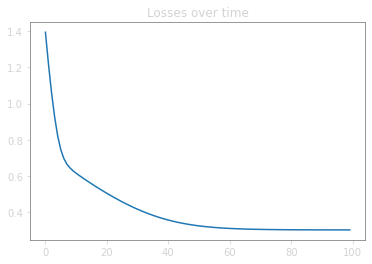

In [85]:
w = torch.rand(2) # our parameeters
w.requires_grad = True # we want to track gradients

# SGD = Stochastic Gradient Descent
optimizer = torch.optim.SGD([w], lr=0.2) # inlining learning rate to 0.2

losses = [] # keep track of the losses (RMSE values)
ws = [] # keep track of the values predicted by the model

for i in range(100):
    # Reset everything related to the gradient calculation
    optimizer.zero_grad()

    # Get our outputs
    y_hat = w[0]*x + w[1]

    # Calculate the loss
    loss = rmse(y, y_hat)

    # Store the loss for later
    losses.append(loss.detach().item())
    ws.append(w.clone().detach().numpy())

    # Print out updates every few iterations
    if i % 20 == 0:
        print(f'-- [i={i}] -- \nloss = {loss}')

    # Backpropagate the loss and use it to update the parameters
    loss.backward() # This does all the gradient calculations
    optimizer.step() # This updates the parameters

plt.plot(losses)
plt.title('Losses over time')